using naive bayes classifier and support vector machine (SVM) to understand contributing factors for diabetes in Pima population.The Pima are Native Americans based in Arizona. As a result of changes in diet and physical activity, they have
developed a very high incidence of Type 2 diabetes. The anonymous medical data used in this notebook was
obtained from 768 Pima women. It comprises 8 attributes that might be used to predict diabetes status (the 9th
column in the dataset, which is the class to be predicted). 

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import scipy.stats as stats

import phik

1

In [142]:
dataDir = "data"
dataFile = dataDir + '/pima-indians-diabetes.csv'

import os.path
if not os.path.isfile(dataFile):
    import requests #Remember: you may need to install the requests modeule: 
    url="https://gist.github.com/chaityacshah/899a95deaf8b1930003ae93944fd17d7/raw/3d35de839da708595a444187e9f13237b51a2cbe/pima-indians-diabetes.csv"
    r=requests.get(url)
    with open(dataFile, 'wb') as f:
        f.write(r.content)

In [143]:
pimaDf=pd.read_csv("data/pima-indians-diabetes.csv")

In [144]:
pimaDf      

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


2

In [145]:
pimaDf=pimaDf.rename({"1. Number of times pregnant":"NumPreg",
'2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test':'PlasmaGlucose',
'3. Diastolic blood pressure (mm Hg)':'DiastolicBP',
'4. Triceps skin fold thickness (mm)':'SkinFold',
'5. 2-Hour serum insulin (mu U/ml)':'SerumInsulin',
'6. Body mass index (weight in kg/(height in m)^2)':'BMI',
'7. Diabetes pedigree function':'PedFn',
'8. Age (years)':'AgeYrs',
'9. Class variable (0 or 1)':'DiabetesClass'
},
axis=1)

In [146]:
pimaDf.head(1)

,NumPreg,PlasmaGlucose,DiastolicBP,SkinFold,SerumInsulin,BMI,PedFn,AgeYrs,DiabetesClass
0,6,148,72,35,0,33.6,0.627,50,1


3

[Text(0.5, 1.0, 'pearson')]

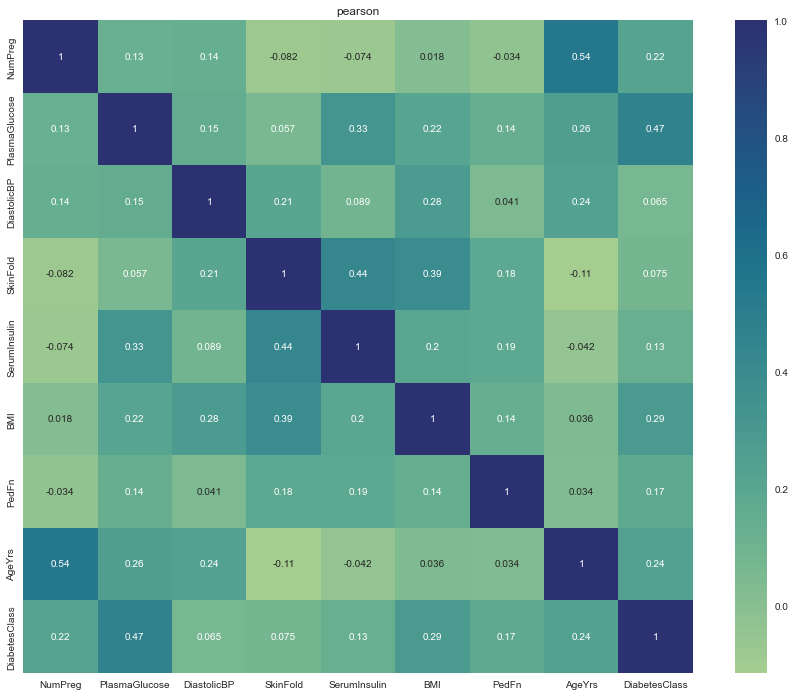

In [147]:
pima_corr=pimaDf.corr(method='pearson')
plt.figure(figsize = (15,12))
sns.heatmap(pima_corr,annot=True,cmap="crest").set(title="pearson")

Looking at the correlation matrix we can observe the following points:<br>
1. DiabetesClass has strong correlation with PlasmaGlucose and BMI.<br>
2. DiabetesClass has relatively little correlation with diastolic blood pressure and skinfold.
3. AgeYrs and NumPreg has relatively high correlation (ie more than 0.5) between each other. Since the correlation is not very high it is not mandatory to remove the variable.



In [148]:
# missing data
if (pimaDf.isnull().sum().sum()) == 0:
    print("There are no missing value")
else:
    print("missing value alert")

There are no missing value


[Text(0.5, 1.0, 'AgeYrs')]

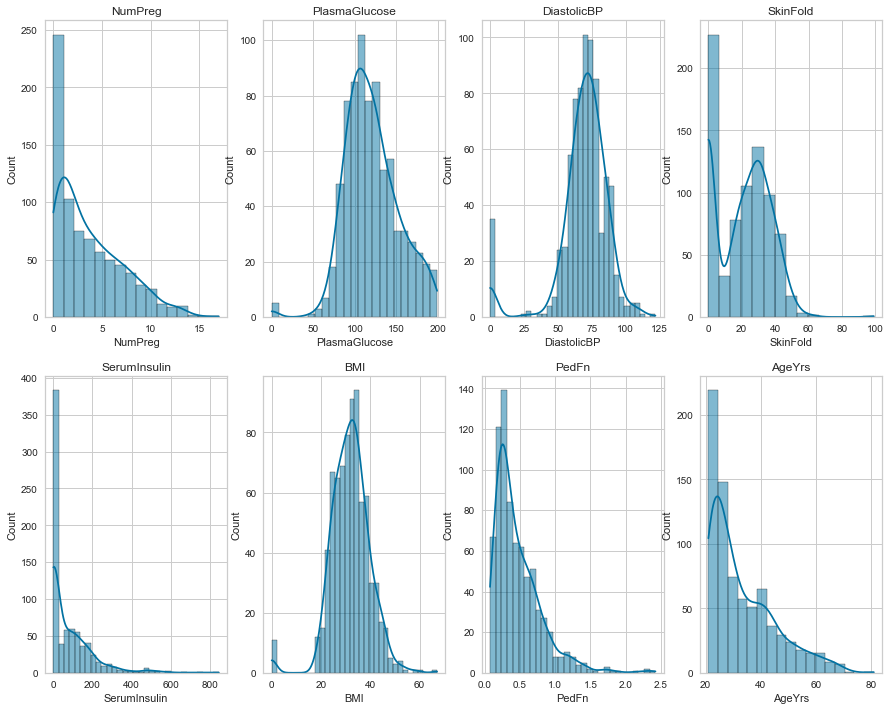

In [149]:
fig, ax=plt.subplots(2,4,figsize=(15,12))
sns.histplot(pimaDf.NumPreg,ax=ax[0,0],kde=True).set(title="NumPreg")
sns.histplot(pimaDf.PlasmaGlucose,ax=ax[0,1],kde=True).set(title="PlasmaGlucose")
sns.histplot(pimaDf.DiastolicBP,ax=ax[0,2],kde=True).set(title="DiastolicBP")
sns.histplot(pimaDf.SkinFold,ax=ax[0,3],kde=True).set(title="SkinFold")
sns.histplot(pimaDf.SerumInsulin,ax=ax[1,0],kde=True).set(title="SerumInsulin")
sns.histplot(pimaDf.BMI,ax=ax[1,1],kde=True).set(title="BMI")
sns.histplot(pimaDf.PedFn,ax=ax[1,2],kde=True).set(title="PedFn")
sns.histplot(pimaDf.AgeYrs,ax=ax[1,3],kde=True).set(title="AgeYrs")


Many entries of predictors are indicated as zero. Some of the variables cannot be zero for a living person, which might indicate missing values. <br>
The predictor 'NumPreg' has almost 250 entries equal to 0. Since this predictor might have 0 as an entry it doesnot indicate missing value. <br>
'PlasmaGlucose', there are about 4 entries equal to 0. These zero entries might actually be missing vales. <br>
'DiastolicBP', there are about 37 entries equal to 0. These zero entries might actually be missing vales. <br>
'SkinFold', there are over 250 entries equal to 0. These zero entries might actually be missing vales. <br>
'SerumInsulin', there are over 350 entries equal to 0. TThese zero entries might actually be missing vales<br>
'BMI', there are about 10 entries equal to 0. These zero entries might actually be missing vales. <br>
'PedFn', there are about 70 entries equal to 0. These zero entries might actually be missing vales. <br>
'AgeYrs', there are more than 200 entries equal to 0. These zero entries might actually be missing vales.<br>

5

In [150]:
#missing value imputation
filteredPimaDf=pimaDf.copy(deep=True)
filteredPimaDf['PlasmaGlucose']= filteredPimaDf['PlasmaGlucose'].replace(0,filteredPimaDf.PlasmaGlucose.median())
filteredPimaDf['DiastolicBP']= filteredPimaDf['DiastolicBP'].replace(0,filteredPimaDf.DiastolicBP.median())
filteredPimaDf['SkinFold']= filteredPimaDf['SkinFold'].replace(0,filteredPimaDf.SkinFold.median())
filteredPimaDf['SerumInsulin']= filteredPimaDf['SerumInsulin'].replace(0,filteredPimaDf.SerumInsulin.median())
filteredPimaDf['BMI']= filteredPimaDf['BMI'].replace(0,filteredPimaDf.BMI.median())
filteredPimaDf['PedFn']= filteredPimaDf['PedFn'].replace(0,filteredPimaDf.PedFn.median())
filteredPimaDf['AgeYrs']= filteredPimaDf['AgeYrs'].replace(0,filteredPimaDf.AgeYrs.median())
filteredPimaDf.head(5)

,NumPreg,PlasmaGlucose,DiastolicBP,SkinFold,SerumInsulin,BMI,PedFn,AgeYrs,DiabetesClass
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


6

In [151]:
predNames=filteredPimaDf.drop(['DiabetesClass'], axis=1)
className=filteredPimaDf.DiabetesClass
from sklearn.model_selection import train_test_split
X_train_, X_test_, y_train, y_test = train_test_split(predNames, className, test_size=254, random_state=999)

# Apply minimax scalar 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
scaler.fit(X_train_); 
X_train = scaler.transform(X_train_)
X_test = scaler.transform(X_test_)

7

In [152]:
#  Create a Naive Bayes Classifier(gaussian)
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
modelNB=GaussianNB()
modelNB.fit(X_train, y_train)

#Calculating Accuracy(0.75984)
y_pred = modelNB.predict(X_test)
accuracy_NB = accuracy_score(y_test,y_pred)
print(":::Accuracy score::: ")
print(accuracy_NB)
print(' ')
#Printing confusion matrix
conf = confusion_matrix(y_test, y_pred)
print(":::Confusion Matrix:::")
print(conf)
print(' ')
#Printing classification report
Report = classification_report(y_test, y_pred)
print(":::Classification Report:::")
print (Report)

:::Accuracy score::: 
0.7519685039370079
 
:::Confusion Matrix:::
[[142  30]
 [ 33  49]]
 
:::Classification Report:::
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       172
           1       0.62      0.60      0.61        82

    accuracy                           0.75       254
   macro avg       0.72      0.71      0.71       254
weighted avg       0.75      0.75      0.75       254



8

In [153]:
#SVM Classifier
from sklearn.svm import SVC
modelSVM = SVC()
modelSVM.fit(X_train, y_train)

#Accuracy (.7677)
y_pred = modelSVM.predict(X_test)
accuracy_svm = accuracy_score(y_test,y_pred)
print(":::Accuracy score::: ")
print(accuracy_svm)
print(' ')
#Printing confusion matrix
conf = confusion_matrix(y_test, y_pred)
print(":::Confusion Matrix:::")
print(conf)
print(' ')
#Printing classification report
Report = classification_report(y_test, y_pred)
print(":::Classification Report:::")
print (Report)

:::Accuracy score::: 
0.7637795275590551
 
:::Confusion Matrix:::
[[143  29]
 [ 31  51]]
 
:::Classification Report:::
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       172
           1       0.64      0.62      0.63        82

    accuracy                           0.76       254
   macro avg       0.73      0.73      0.73       254
weighted avg       0.76      0.76      0.76       254

